In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## Data Preprocessing

In [3]:
X = df[['blueFirstBlood','blueKills','blueDeaths','blueAssists','blueEliteMonsters'
      ,'blueDragons','blueHeralds','blueTotalGold','blueAvgLevel','blueTotalMinionsKilled'
     ,'redKills','redDeaths','redAssists','redEliteMonsters','redDragons','redHeralds'
     ,'redTotalGold','redAvgLevel','redTotalMinionsKilled']]
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [4]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

[[719 280]
 [272 705]]
Accuracy:0.7206477732793523


Text(30.5, 0.5, 'true')

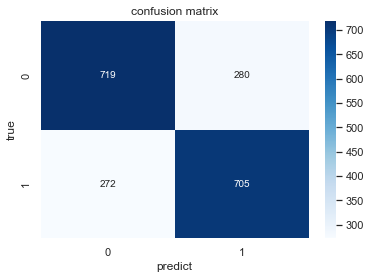

In [5]:
X_train1 = X_train
X_test1 = X_test
y_train1 = y_train
y_test1 = y_test
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)
f, ax = plt.subplots()
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred1,labels=[0,1])
print(cm)
print('Accuracy:' + str(accuracy_score(y_test1, y_pred1)))
sns.heatmap(cm, cmap='Blues', annot=True, ax=ax, fmt='d')
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

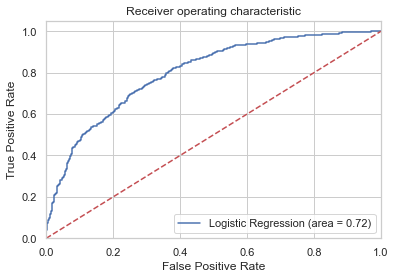

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

## Linear Discriminant Analysis(LDA)

[[716 283]
 [268 709]]
Accuracy:0.7211538461538461


Text(30.5, 0.5, 'true')

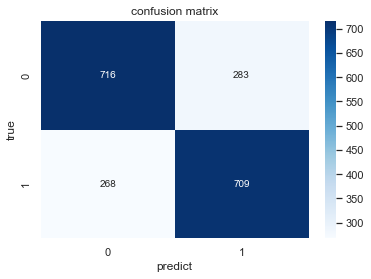

In [7]:
X_train2 = X_train
X_test2 = X_test
y_train2 = y_train
y_test2 = y_test
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
lda.fit(X_train2, y_train2)
y_pred2 = lda.predict(X_test2)

f,ax = plt.subplots()
cm = confusion_matrix(y_test2, y_pred2, labels=[0,1])
print(cm)
print('Accuracy:' + str(accuracy_score(y_test2, y_pred2)))
sns.heatmap(cm,cmap='Blues', annot=True, ax=ax, fmt='d')
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

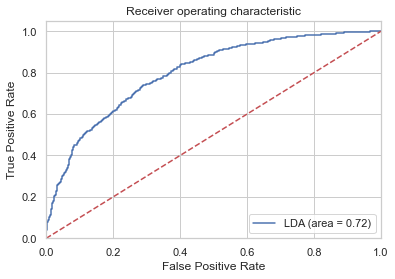

In [8]:
lda_roc_auc = roc_auc_score(y_test2, lda.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, lda.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Lda_ROC')
plt.show()

## Quadratic Discriminant Analysis(QDA)

[[355 644]
 [ 85 892]]
Accuracy:0.6310728744939271


/Users/behind3220/miniconda3/envs/beamznt/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Text(30.5, 0.5, 'true')

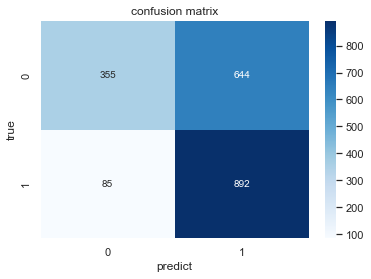

In [9]:
X_train3 = X_train
X_test3 = X_test
y_train3 = y_train
y_test3 = y_test
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda_model = qda.fit(X_train3, y_train3)
y_pred3 = qda_model.predict(X_test3)
#confusion matrix
f,ax = plt.subplots()
cm = confusion_matrix(y_test3, y_pred3,labels=[0,1])
print(cm)
print('Accuracy:' + str(accuracy_score(y_test3, y_pred3)))
sns.heatmap(cm,cmap='Blues',annot=True,ax=ax,fmt='d')
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

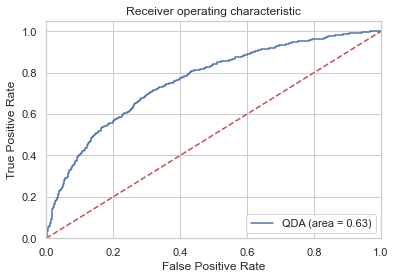

In [10]:
qda_roc_auc = roc_auc_score(y_test3, qda.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test3, qda.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='QDA (area = %0.2f)' % qda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Qda_ROC')
plt.show()

## Gaussian Naive Bayes

[[711 288]
 [283 694]]
Accuracy:0.7110323886639676


Text(30.5, 0.5, 'true')

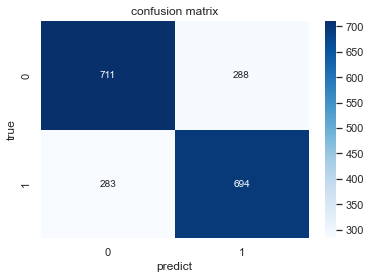

In [11]:
X_train4 = X_train
X_test4 = X_test
y_train4 = y_train
y_test4 = y_test
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train4, y_train4)
y_pred4 = gnb_model.predict(X_test4)
f, ax = plt.subplots()
cm = confusion_matrix(y_test4, y_pred4,labels=[0,1])
print(cm)
print('Accuracy:' + str(accuracy_score(y_test4, y_pred4)))
sns.heatmap(cm,cmap='Blues', annot=True, ax=ax, fmt='d')
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

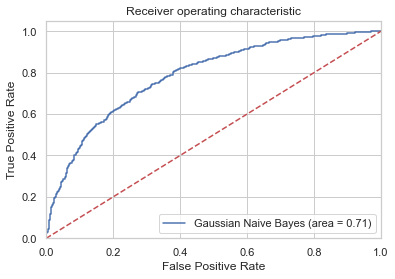

In [12]:
gnb_roc_auc = roc_auc_score(y_test4, gnb.predict(X_test4))
fpr, tpr, thresholds = roc_curve(y_test4, gnb.predict_proba(X_test4)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('gnb_ROC')
plt.show()

## Random Forest Classifier

[[682 317]
 [272 705]]
Accuracy:0.7019230769230769


Text(30.5, 0.5, 'true')

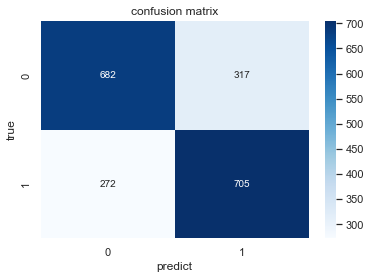

In [13]:
X_train5 = X_train
X_test5 = X_test
y_train5 = y_train
y_test5 = y_test
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train5, y_train5)
y_pred5 = classifier.predict(X_test5)
#confusion matrix
f,ax = plt.subplots()
cm = confusion_matrix(y_test5, y_pred5,labels=[0,1])
print(cm)
print('Accuracy:' + str(accuracy_score(y_test5, y_pred5)))
sns.heatmap(cm,cmap='Blues',annot=True,ax=ax,fmt='d')
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

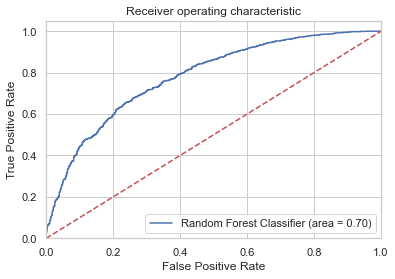

In [14]:
classifier_roc_auc = roc_auc_score(y_test5, classifier.predict(X_test5))
fpr, tpr, thresholds = roc_curve(y_test5, classifier.predict_proba(X_test5)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % classifier_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('rf_ROC')
plt.show()

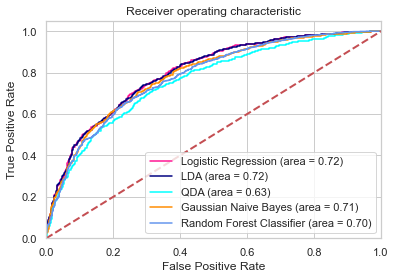

In [15]:
fpr = dict()
tpr = dict()
thresholds = dict()
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr['logit'], tpr['logit'], thresholds['logit'] = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])

lda_roc_auc = roc_auc_score(y_test2, lda.predict(X_test2))
fpr['lda'], tpr['lda'], thresholds['lda'] = roc_curve(y_test2, lda.predict_proba(X_test2)[:,1])

qda_roc_auc = roc_auc_score(y_test3, qda.predict(X_test3))
fpr['qda'], tpr['qda'], thresholds['qda'] = roc_curve(y_test3, qda.predict_proba(X_test3)[:,1])

gnb_roc_auc = roc_auc_score(y_test4, gnb.predict(X_test4))
fpr['gnb'], tpr['gnb'], thresholds['gnb'] = roc_curve(y_test4, gnb.predict_proba(X_test4)[:,1])

classifier_roc_auc = roc_auc_score(y_test5, classifier.predict(X_test5))
fpr['rf'], tpr['rf'], thresholds['rf'] = roc_curve(y_test5, classifier.predict_proba(X_test5)[:,1])
plt.figure()
plt.plot(fpr['logit'], tpr['logit'], label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color='deeppink')
plt.plot(fpr['lda'], tpr['lda'], label='LDA (area = %0.2f)' % lda_roc_auc, color='navy')
plt.plot(fpr['qda'], tpr['qda'], label='QDA (area = %0.2f)' % qda_roc_auc, color='aqua')
plt.plot(fpr['gnb'], tpr['gnb'], label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc, color='darkorange')
plt.plot(fpr['rf'], tpr['rf'], label='Random Forest Classifier (area = %0.2f)' % classifier_roc_auc, color='cornflowerblue')
plt.plot([0, 1], [0, 1],'r--',lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Overall_ROC')
plt.show()

In [16]:
manual = False
defeault_input = [1, 3, 0, 4, 0, 0, 0, 16300, 7.2, 331, 0, 3, 0, 2, 1, 1, 14800, 7, 329]

In [17]:
weights = logreg.coef_
features = np.zeros(19)
print('Please input only numbers.(P.S. yes=1, no=0)')
ntinput = ['blueFirstBlood','blueKills','blueDeaths','blueAssists','blueEliteMonsters'
      ,'blueDragons','blueHeralds','blueTotalGold','blueAvgLevel','blueTotalMinionsKilled'
     ,'redKills','redDeaths','redAssists','redEliteMonsters','redDragons','redHeralds'
     ,'redTotalGold','redAvgLevel','redTotalMinionsKilled']
for i in range(19):
    if manual:
        print(ntinput[i], ":")
        features[i] = input()
    else:
        features[i] = defeault_input[i]
        print(ntinput[i], ":", features[i])
scores = np.inner(features,weights) + logreg.intercept_

Please input only numbers.(P.S. yes=1, no=0)
blueFirstBlood : 1.0
blueKills : 3.0
blueDeaths : 0.0
blueAssists : 4.0
blueEliteMonsters : 0.0
blueDragons : 0.0
blueHeralds : 0.0
blueTotalGold : 16300.0
blueAvgLevel : 7.2
blueTotalMinionsKilled : 331.0
redKills : 0.0
redDeaths : 3.0
redAssists : 0.0
redEliteMonsters : 2.0
redDragons : 1.0
redHeralds : 1.0
redTotalGold : 14800.0
redAvgLevel : 7.0
redTotalMinionsKilled : 329.0


In [18]:
if 1 / (1 + np.exp(-scores)) > 0.5:
    print('blueWins')
else:
    print('redWins')

blueWins


In [19]:
for i in range(19):
    print(ntinput[i],'coef:',logreg.coef_[0,i])
print('intercept coef:',logreg.intercept_[0])


blueFirstBlood coef: 0.008633374455924317
blueKills coef: 0.020419041544825264
blueDeaths coef: -0.025915231293931282
blueAssists coef: -0.11729689442369709
blueEliteMonsters coef: 0.07084077548704903
blueDragons coef: 0.10807263714000445
blueHeralds coef: -0.019842030939685514
blueTotalGold coef: 0.8545828557979004
blueAvgLevel coef: 0.1299233030293341
blueTotalMinionsKilled coef: -0.05168506533036132
redKills coef: -0.025915231293931282
redDeaths coef: 0.020419041544825264
redAssists coef: 0.03254912792820108
redEliteMonsters coef: -0.06329747963171102
redDragons coef: -0.08938324935420923
redHeralds coef: 0.011811191741360359
redTotalGold coef: -0.7387560225994327
redAvgLevel coef: -0.16787630507049936
redTotalMinionsKilled coef: 0.07085421420741611
intercept coef: 0.003217653953639019
